# OLIMPIJSKE IGRE

Analiza dosežkov na olimpijskih igrah po državah in pogostosti posameznih športnih disciplin na olimpijskih igrah.

## Uvoz podatkov

In [165]:
import pandas as pd
import seaborn as sns          # za lepo risanje grafov             # da se grafi prikažejo v notebooku
%matplotlib inline
pd.options.display.max_rows = 10

MEDALJE = pd.read_csv("oi8.3_medalje_pregled.csv", index_col=0)
DISCIPLINE = pd.read_csv("oi9.3_discipline_pregled.csv", index_col=0)

In [166]:
vrsta = "summer"    # izberem lahko "summer" ali "winter"


# .filter(like="Summer")
# .filter(like=vrsta.capitalize())

# .replace("-Summer", "")
# .replace(f"-{vrsta.capitalize()}", "")

In [167]:
MEDALJE_IZBRANE = MEDALJE.filter(like=vrsta.capitalize()).astype(int).rename(columns=lambda x: x.replace(f"-{vrsta.capitalize()}", "")).loc[lambda df: ~(df == 0).all(axis=1)]

MEDALJE_SKUPAJ = MEDALJE.filter(like="Skupaj").astype(int).rename(columns=lambda x: x.replace("-Skupaj", "")).loc[lambda df: ~(df == 0).all(axis=1)]
MEDALJE_SKUPAJ_IZBRANE = MEDALJE_IZBRANE.filter(like="Skupaj").astype(int).rename(columns=lambda x: x.replace("-Skupaj", "")).loc[lambda df: ~(df == 0).all(axis=1)]
MEDALJE_SKUPAJ2_IZBRANE = MEDALJE_IZBRANE.filter(like="Skupaj").astype(int).rename(columns=lambda x: x.split('-')[0]).loc[lambda df: ~(df == 0).all(axis=1)] #samo letnice, ne mesta

In [168]:
DISCIPLINE_IZBRANE = DISCIPLINE.filter(like=vrsta.capitalize()).astype(int).rename(columns=lambda x: x.replace(f"-{vrsta.capitalize()}", "")).loc[lambda df: ~(df == 0).all(axis=1)]

##

## Splošno

Število olimpijskih iger

In [169]:
print(f"Skupaj olimpijskih iger: {len(DISCIPLINE.columns)}")

if vrsta == "summer":
    print(f"Poletne olimpijske igre: {len(DISCIPLINE_IZBRANE.columns)}")
    print(f"Zimske olimpijske igre: {len(DISCIPLINE.columns) - len(DISCIPLINE_IZBRANE.columns)}")
else:
    print(f"Poletne olimpijske igre: {len(DISCIPLINE.columns)} - {len(DISCIPLINE_IZBRANE.columns)}")
    print(f"Zimske olimpijske igre: {len(DISCIPLINE.columns) - len(DISCIPLINE_IZBRANE.columns)}")

Skupaj olimpijskih iger: 54
Poletne olimpijske igre: 30
Zimske olimpijske igre: 24


Lokacija olimpijskih iger

In [170]:
kraji = DISCIPLINE.columns.str.split("-", n=2).str[1].value_counts()
kraji_najvec_oi = kraji[kraji == kraji.max()]

print(f"Največrat so se Olimpijske igre odvijale v {", ".join(kraji_najvec_oi.index)} in sicer {kraji.max()}-krat.")     #sklanjanje!!

Največrat so se Olimpijske igre odvijale v Paris, London in sicer 3-krat.


In [171]:
mesto = "Tokyo"     # mesto za katero me zanima

if mesto.replace(" ", "_") not in kraji:
    print(f'Mesto {mesto} ni nikoli gostilo Olimpijskih iger.')
else:
    katera_leta = DISCIPLINE.columns[DISCIPLINE.columns.str.contains(f"-{mesto.replace(" ", "_")}-")].str.split("-", n=2).str[0]
    print(f"Mesto {mesto} je gostilo Olimpijske igre {kraji[mesto.replace(" ", "_")]}-krat, in sicer leta {', '.join(katera_leta)}.")

Mesto Tokyo je gostilo Olimpijske igre 2-krat, in sicer leta 1964, 2020.


In [172]:
mesto = "Ljubljana"     # mesto za katero me zanima

if mesto.replace(" ", "_") not in kraji:
    print(f'Mesto {mesto} ni nikoli gostilo Olimpijskih iger.')
else:
    katera_leta = DISCIPLINE.columns[DISCIPLINE.columns.str.contains(f"-{mesto.replace(" ", "_")}-")].str.split("-", n=2).str[0]
    print(f"Mesto {mesto} je gostilo Olimpijske igre {kraji[mesto.replace(" ", "_")]}-krat, in sicer leta {', '.join(katera_leta)}.")

Mesto Ljubljana ni nikoli gostilo Olimpijskih iger.


## Medalje

Koliko medalj je bilo podeljenih vsako leto

In [173]:
MEDALJE_SKUPAJ.loc['Skupaj'] = MEDALJE_SKUPAJ.drop('Skupaj', errors='ignore').sum()
MEDALJE_SKUPAJ_IZBRANE.loc['Skupaj'] = MEDALJE_SKUPAJ_IZBRANE.drop('Skupaj', errors='ignore').sum()
MEDALJE_SKUPAJ2_IZBRANE.loc['Skupaj'] = MEDALJE_SKUPAJ2_IZBRANE.drop('Skupaj', errors='ignore').sum()

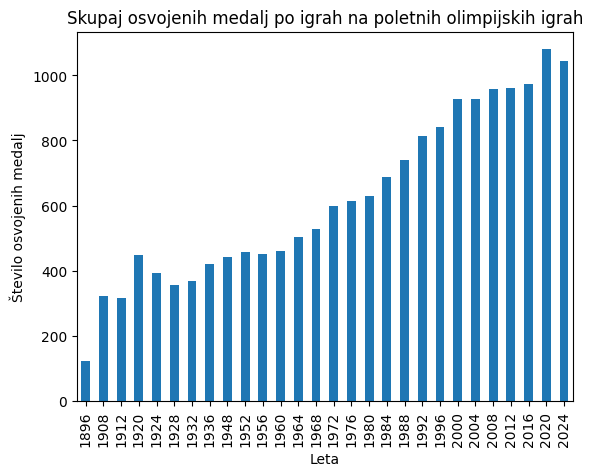

In [174]:
# MEDALJE_SKUPAJ2_IZBRANE.loc['Skupaj'].plot.bar()
MEDALJE_SKUPAJ2_IZBRANE.loc['Skupaj'].plot.bar(title="Skupaj osvojenih medalj po igrah na poletnih olimpijskih igrah", ylabel="Število osvojenih medalj", xlabel="Leta");

Katera država jih je tekom vseh let dobila največ in koliko, katero leto največ

In [ ]:
MEDALJE_SKUPAJ = MEDALJE_SKUPAJ.drop(index='Skupaj', errors='ignore').drop(columns='Skupaj', errors='ignore')\
    .assign(Skupaj=lambda df: df.sum(axis=1)).sort_values(by="Skupaj", ascending=False)
MEDALJE_SKUPAJ_IZBRANE = MEDALJE_SKUPAJ_IZBRANE.drop('Skupaj', errors='ignore').drop(columns='Skupaj', errors='ignore')\
    .assign(Skupaj=lambda df: df.sum(axis=1)).sort_values(by="Skupaj", ascending=False)

# MEDALJE_SKUPAJ.iloc[:, [-1]] # le indeks in zadnji stolpec

In [182]:
print(f"Od leta {MEDALJE_SKUPAJ.columns[0].split('-')[0]} je na Olimpijskih igrah "
      f"skupno največ medalj dosegla {MEDALJE_SKUPAJ.index[0]} in sicer {MEDALJE_SKUPAJ.iloc[0, -1]}.\n"
      f"Največ medalj so osvojili leta {MEDALJE_SKUPAJ.iloc[0, :-1].idxmax().split('-')[0]} "
      f"v mestu {MEDALJE_SKUPAJ.iloc[0, :-1].idxmax().split('-')[1].replace('_', ' ')} "
      f"in sicer {MEDALJE_SKUPAJ.iloc[0, :-1].max()}.")

Od leta 1896 je na Olimpijskih igrah skupno največ medalj dosegla United States of America in sicer 2815.
Največ medalj so osvojili leta 1984 v mestu Los Angeles in sicer 174.


In [183]:
katere = "poletnih" if vrsta == "summer" else "zimskih"

print(f"Od leta {MEDALJE_SKUPAJ_IZBRANE.columns[0].split('-')[0]} je na {katere} olimpijskih igrah "
      f"skupno največ medalj dosegla {MEDALJE_SKUPAJ_IZBRANE.index[0]} in sicer {MEDALJE_SKUPAJ_IZBRANE.iloc[0, -1]}.\n"
      f"Največ medalj so osvojili leta {MEDALJE_SKUPAJ_IZBRANE.iloc[0, :-1].idxmax().split('-')[0]} "
      f"v mestu {MEDALJE_SKUPAJ_IZBRANE.iloc[0, :-1].idxmax().split('-')[1].replace("_", " ")} "
      f"in sicer {MEDALJE_SKUPAJ_IZBRANE.iloc[0, :-1].max()}.")

Od leta 1896 je na poletnih olimpijskih igrah skupno največ medalj dosegla United States of America in sicer 2485.
Največ medalj so osvojili leta 1984 v mestu Los Angeles in sicer 174.


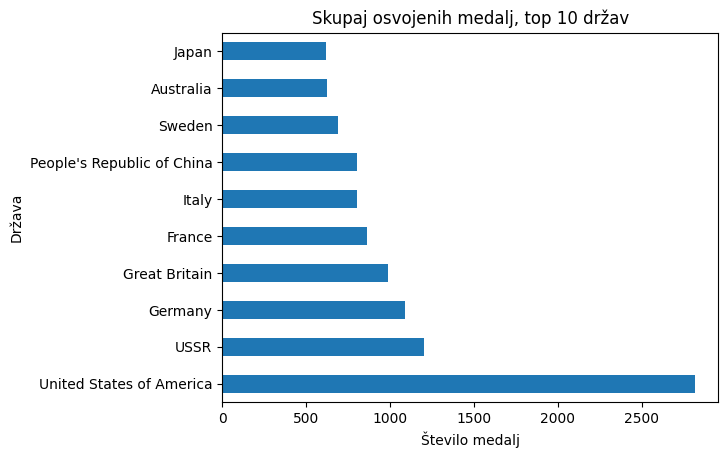

In [178]:
MEDALJE_SKUPAJ['Skupaj'].head(10).plot.barh(title="Skupaj osvojenih medalj, top 10 držav", xlabel="Število medalj", ylabel="Država");

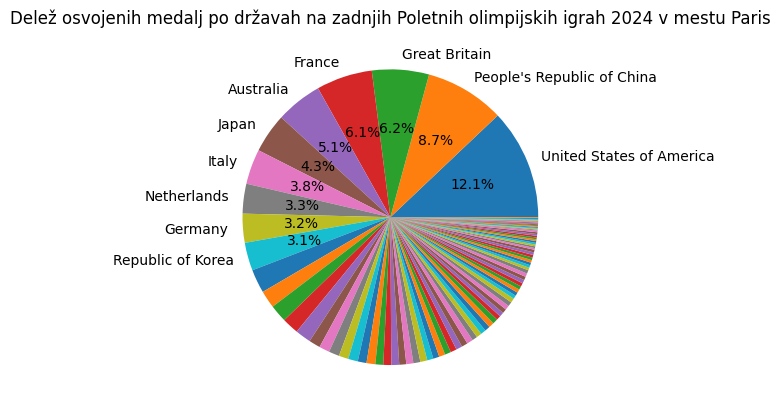

In [ ]:
# zadnje = MEDALJE_SKUPAJ_IZBRANE.columns[-2]
# MEDALJE_SKUPAJ_IZBRANE.sort_values(by=zadnje, ascending=False)[zadnje].plot.pie(
#     title=f"Delež osvojenih medalj po državah na zadnjih {katere.capitalize()} olimpijskih igrah {zadnje.split('-')[0]} v mestu {zadnje.split('-')[1]}", ylabel="",
#     labels=[ime if pct >= 3 else '' 
#         for ime, pct in zip(MEDALJE_SKUPAJ_IZBRANE.sort_values(by=zadnje, ascending=False).index, 
#             100 * MEDALJE_SKUPAJ_IZBRANE.sort_values(by=zadnje, ascending=False)[zadnje] / MEDALJE_SKUPAJ_IZBRANE[zadnje].sum())], 
#     autopct=lambda pct: f"{pct:.1f}%" if pct >= 3 else "");

medalje_zadnjeigre = MEDALJE_SKUPAJ[[MEDALJE_SKUPAJ.columns[-2]]].loc[lambda df: df[df.columns[0]] != 0]
medalje_zadnjeigre.sort_values(by=medalje_zadnjeigre.columns[0], ascending=False).plot.pie(
    y=medalje_zadnjeigre.columns[0],
    title=f"Delež osvojenih medalj po državah na zadnjih {katere.capitalize()} olimpijskih igrah {medalje_zadnjeigre.columns[0].split('-')[0]} v mestu {medalje_zadnjeigre.columns[0].split('-')[1]}",
    ylabel="",
    legend=False,
    labels=[ime if pct >= 3 else '' 
        for ime, pct in zip(medalje_zadnjeigre.sort_values(by=medalje_zadnjeigre.columns[0], ascending=False).index,
            100 * medalje_zadnjeigre.sort_values(by=medalje_zadnjeigre.columns[0], ascending=False)[medalje_zadnjeigre.columns[0]] / medalje_zadnjeigre[medalje_zadnjeigre.columns[0]].sum())],
    autopct=lambda pct: f"{pct:.1f}%" if pct >= 3 else "");

Katere države so skupno dosegle več medalj kot povprečje držav, ki so osvojile vsaj eno medaljo

In [202]:
MEDALJE_SKUPAJ_BOLJSE = MEDALJE_SKUPAJ[MEDALJE_SKUPAJ['Skupaj'] >= MEDALJE_SKUPAJ['Skupaj'].mean()]
MEDALJE_SKUPAJ_BOLJSE.iloc[:, [-1]]

,Skupaj
Država,
United States of America,2815
USSR,1204
Germany,1087
Great Britain,987
France,863
...,...
Brazil,170
Belgium,166
New Zealand,163


In [ ]:
medalje_zadnjeigre = MEDALJE_SKUPAJ[[MEDALJE_SKUPAJ.columns[-2]]].loc[lambda df: df[df.columns[0]] != 0]
boljse_od_povprecja = medalje_zadnjeigre.loc[lambda df: df[df.columns[0]] >= df[df.columns[0]].mean()].sort_values(by=medalje_zadnjeigre.columns[0], ascending=False)
boljse_od_povprecja

,2024-Paris-Summer
Država,
United States of America,126
People's Republic of China,91
Great Britain,65
France,64
Australia,53
...,...
Hungary,19
Spain,18
Uzbekistan,13


## Discipline